## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

### Data Prepocessing

In [12]:
df["Booking_ID"].nunique()

36275

- Booking ID are all unique and will be removed as it will not be useful in our analysis.

In [13]:
df.drop(["Booking_ID"], axis=1, inplace=True)

- We convert `required_car_parking_space` and `repeated_guest` into categorical variable by converting 0 as 'No' and 1 as 'Yes'.

In [15]:
df["required_car_parking_space"] = df["required_car_parking_space"].apply(
    lambda x: "Yes" if x == 1 else "No"
)
df["repeated_guest"] = df["repeated_guest"].apply(
    lambda x: "Yes" if x == 1 else "No"
)

- Convert all 'object' type columns into categorial variable

In [17]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

We now
- Encoding `required_car_parking_space` and `repeated_guest` into 0 as 'No' and 1 as 'Yes'
- Encoding `booking_status` into 0 as 'Not_Canceled' and 1 as 'Canceled'

In [19]:
df["required_car_parking_space"] = df["required_car_parking_space"].apply(
    lambda x: 1 if x == "Yes" else 0
)
df["repeated_guest"] = df["repeated_guest"].apply(
    lambda x: 1 if x == "Yes" else 0
)

In [20]:
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

### Multivariate analysis

We now visualize some selected variables' relationships having `booking_status` as the *hue* parameter, and answering some domain knowledge questions.

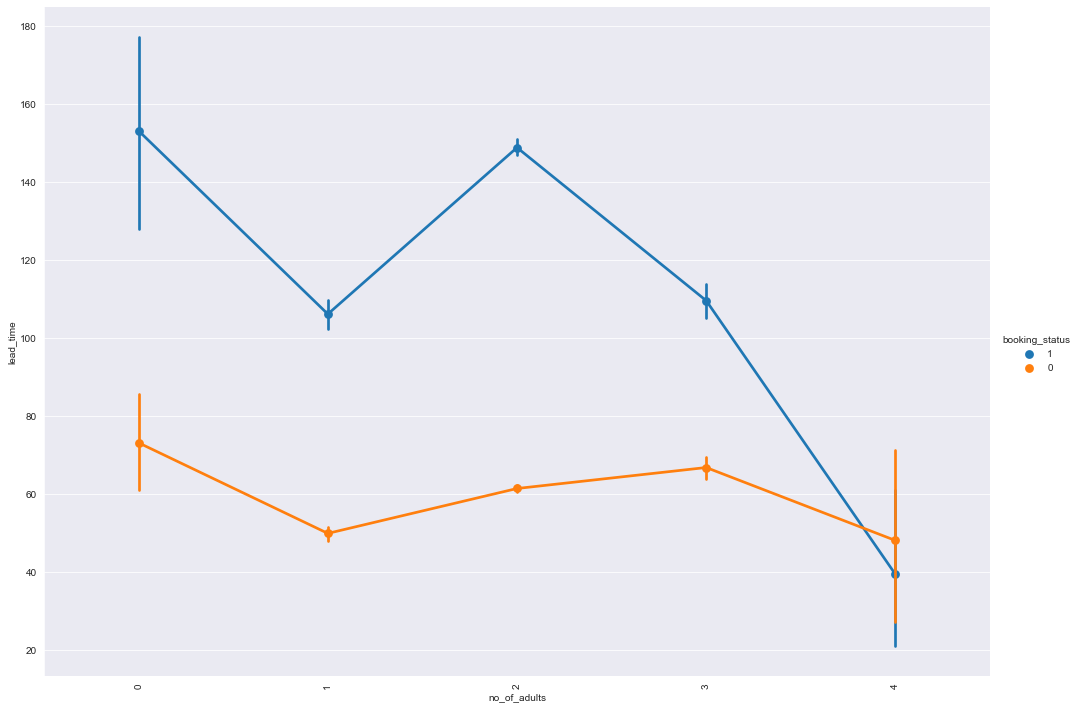

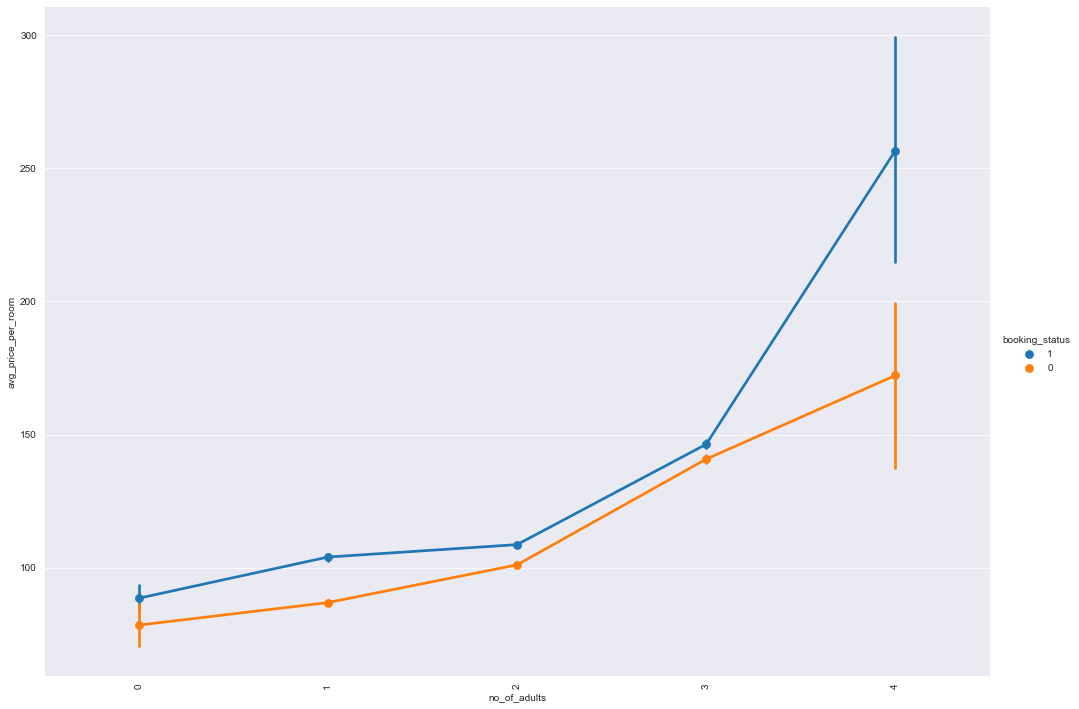

In [35]:
sns.catplot(data=df, kind='point', x="no_of_adults", y="lead_time",hue='booking_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

sns.catplot(data=df, kind='point', x="no_of_adults", y="avg_price_per_room",hue='booking_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- We can see again the longer the lead time the more likely cancellations happen.
- Similarly for average price per room, the more costy it is the more likely to be cancelled.

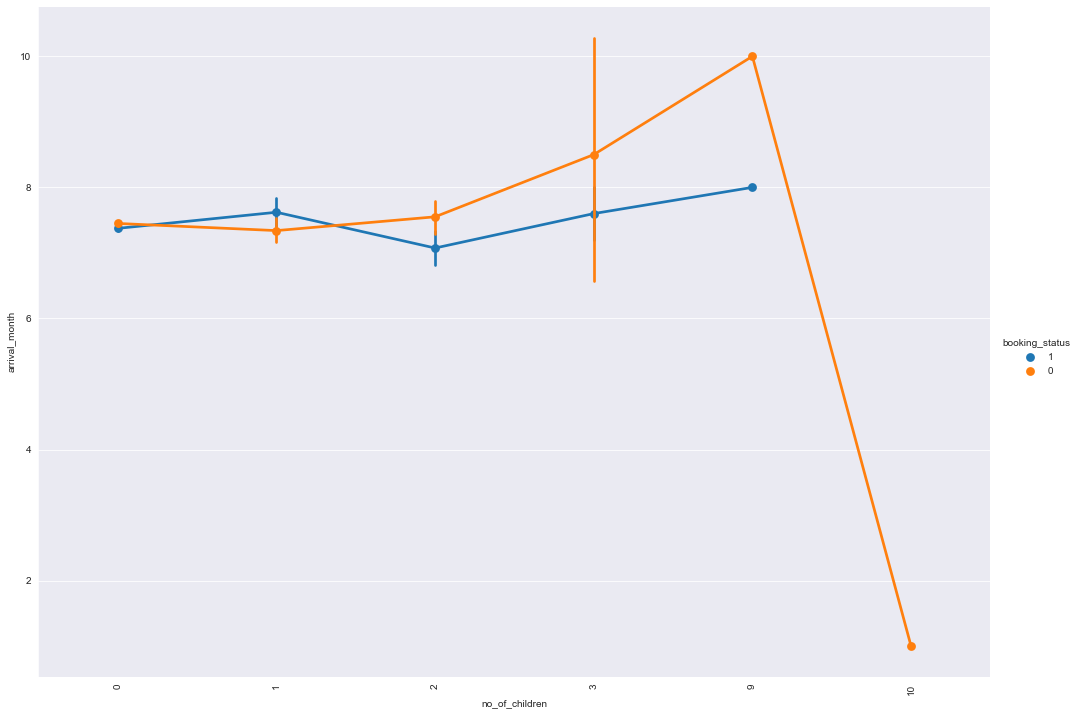

In [36]:
sns.catplot(data=df, kind='point', x="no_of_children", y="arrival_month",hue='booking_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- A natural pattern can be seen where summer holidays, between August to October, more families bringing childrens to travel. 
- An interesting pattern can be seen that cancellations are generally within a month before the holiday starts.

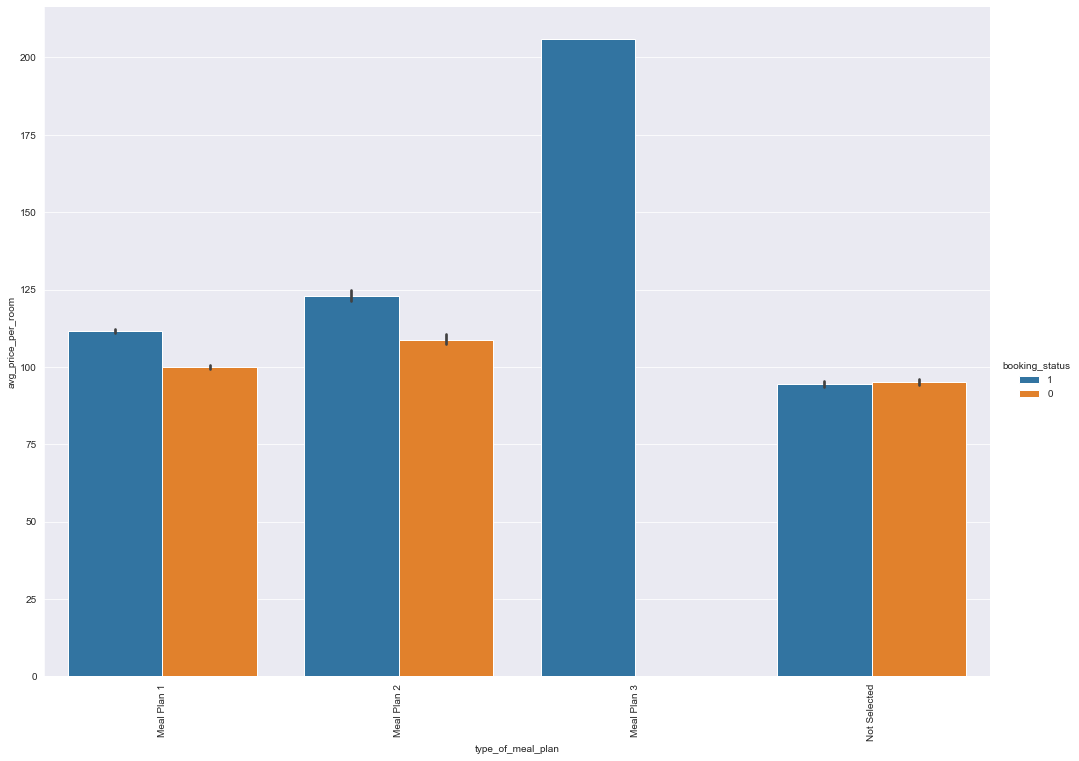

In [37]:
sns.catplot(data=df, kind='bar', x="type_of_meal_plan", y="avg_price_per_room",hue='booking_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- There seems to be a significant increase in average price for bookings with full board meal, in which bookings were cancelled. 

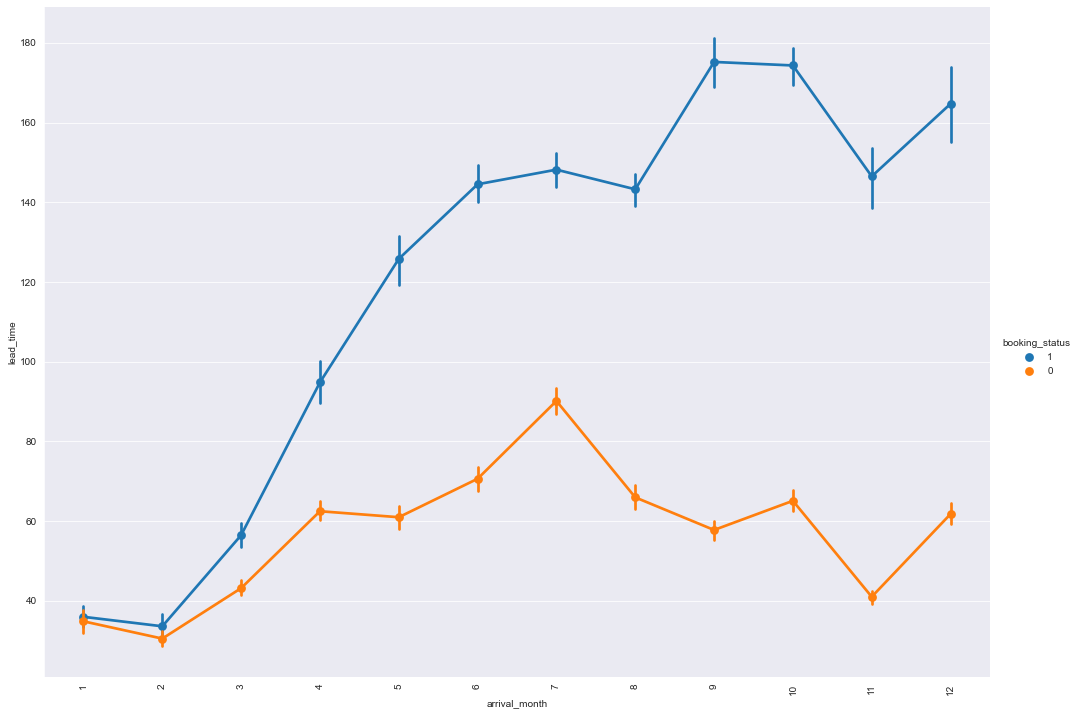

In [38]:
sns.catplot(data=df, kind='point', x="arrival_month", y="lead_time",hue='booking_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- It can be seen that lead time less than 100 days generally is safe from booking cancellations.

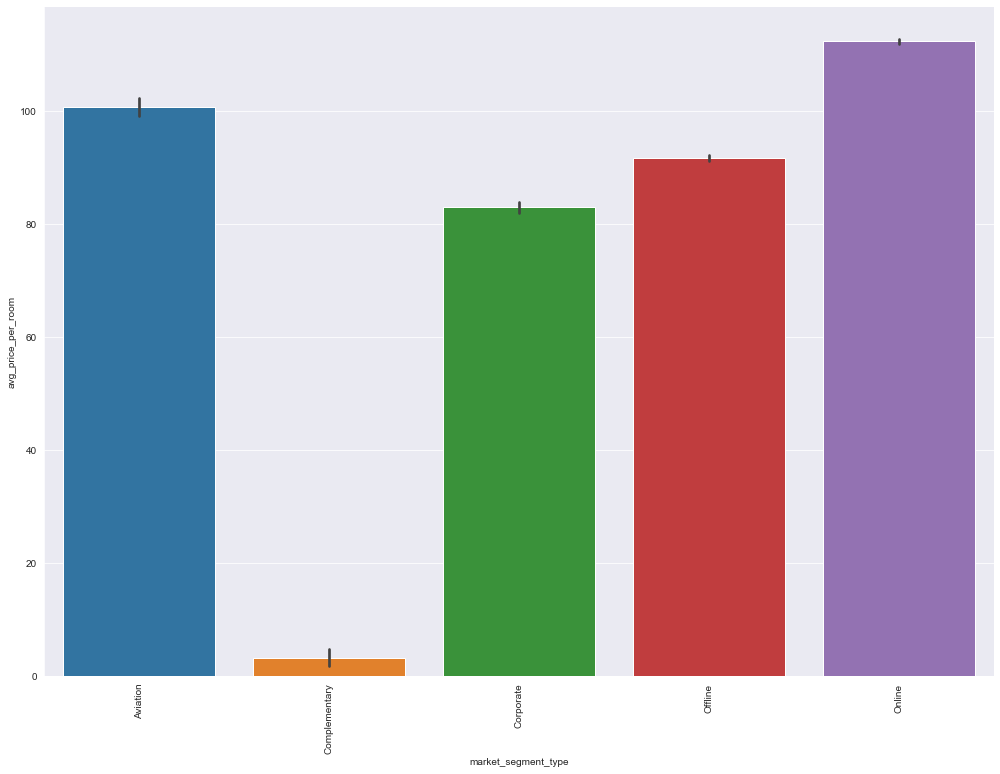

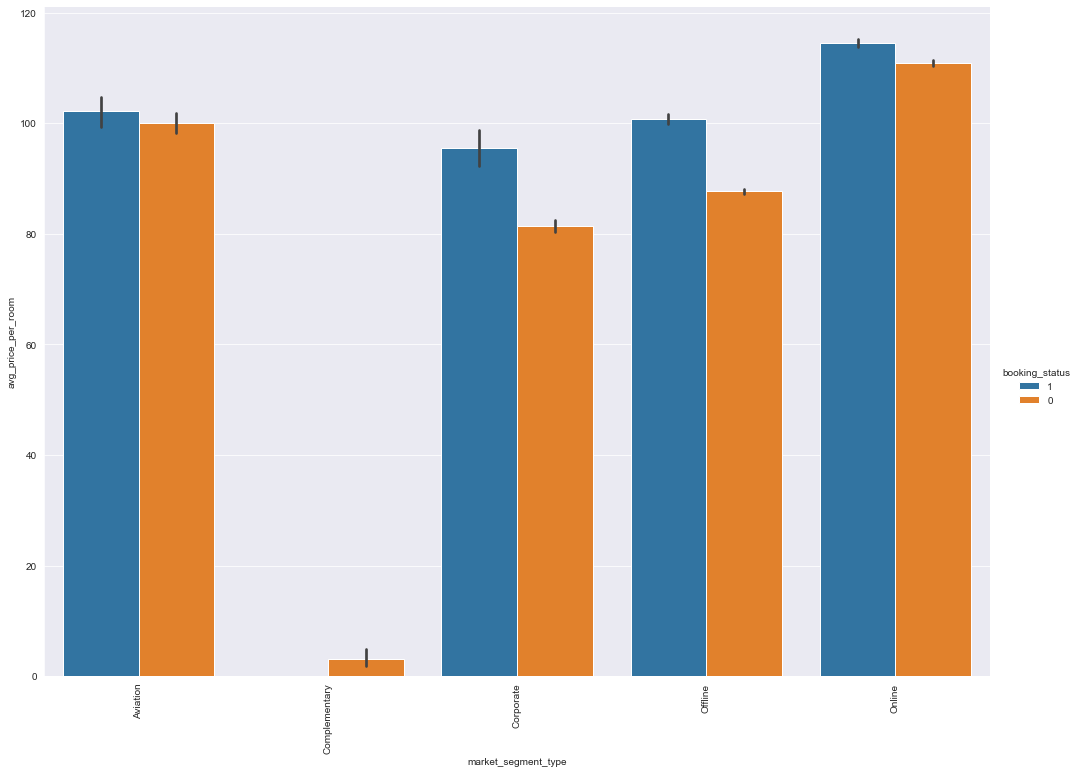

In [39]:
sns.catplot(data=df, kind='bar', x="market_segment_type", y="avg_price_per_room",height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

sns.catplot(data=df, kind='bar', x="market_segment_type", y="avg_price_per_room",hue='booking_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- (3) The average room prices are overall highest from online bookings. Followed by aviation segment. Corporate bookings gets the lowest average price.

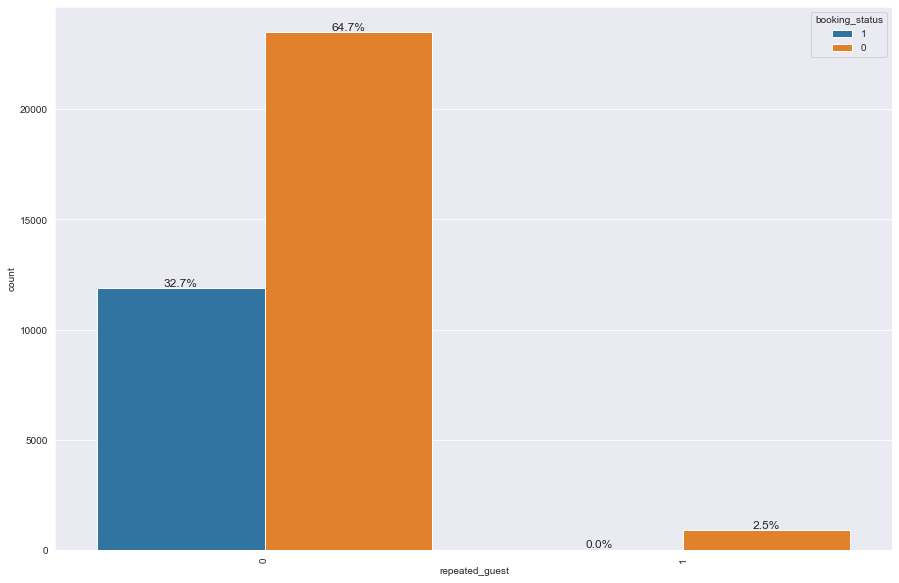

In [40]:
total = len(data["repeated_guest"])  # length of the column
count = data["repeated_guest"].nunique()
plt.figure(figsize=(15,10));
ax = sns.countplot(data=df, x="repeated_guest",hue='booking_status')

for p in ax.patches:
    label = "{:.1f}%".format(
    100 * p.get_height() / total
    )  # percentage of each class of the category  
    
    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
        
    # annotate the percentage on the barplot
    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    ) # for-loop-ends-here 
plt.xticks(rotation=90)
plt.show()

- (5) It is great to see that repeated guest who cancelled is 0%.

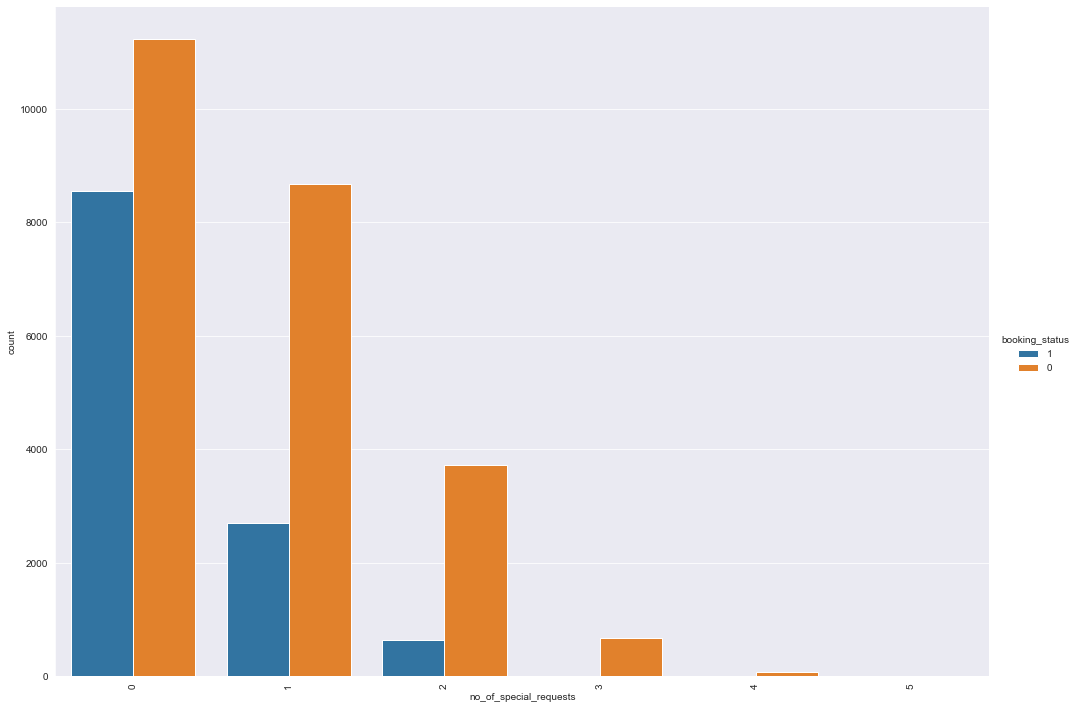

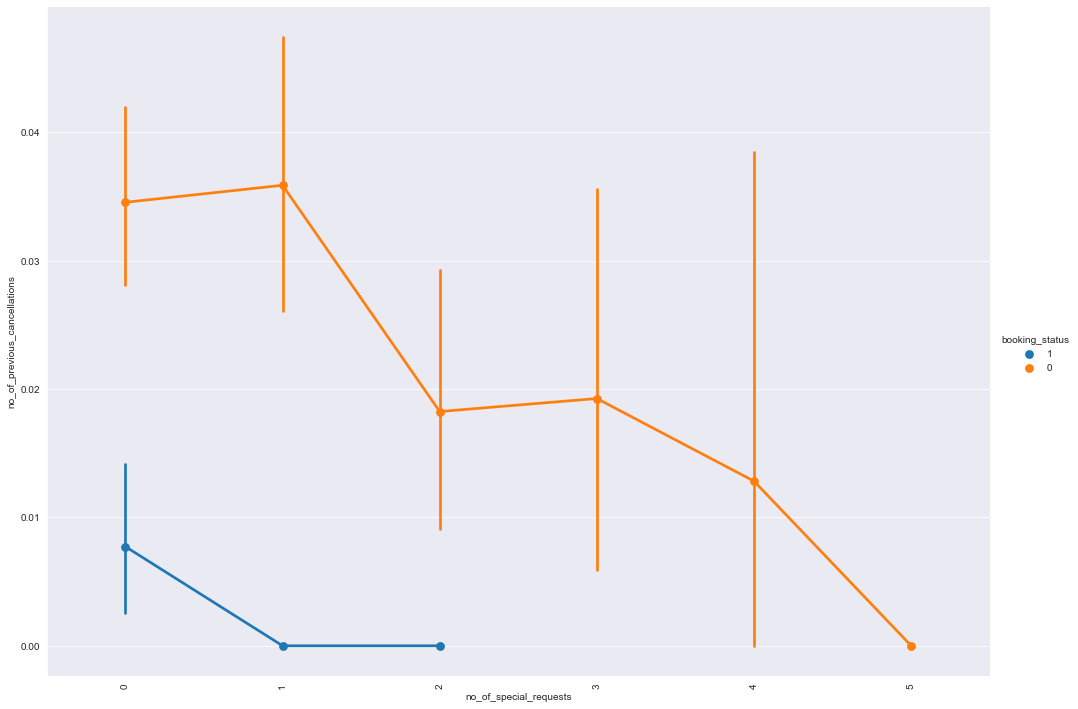

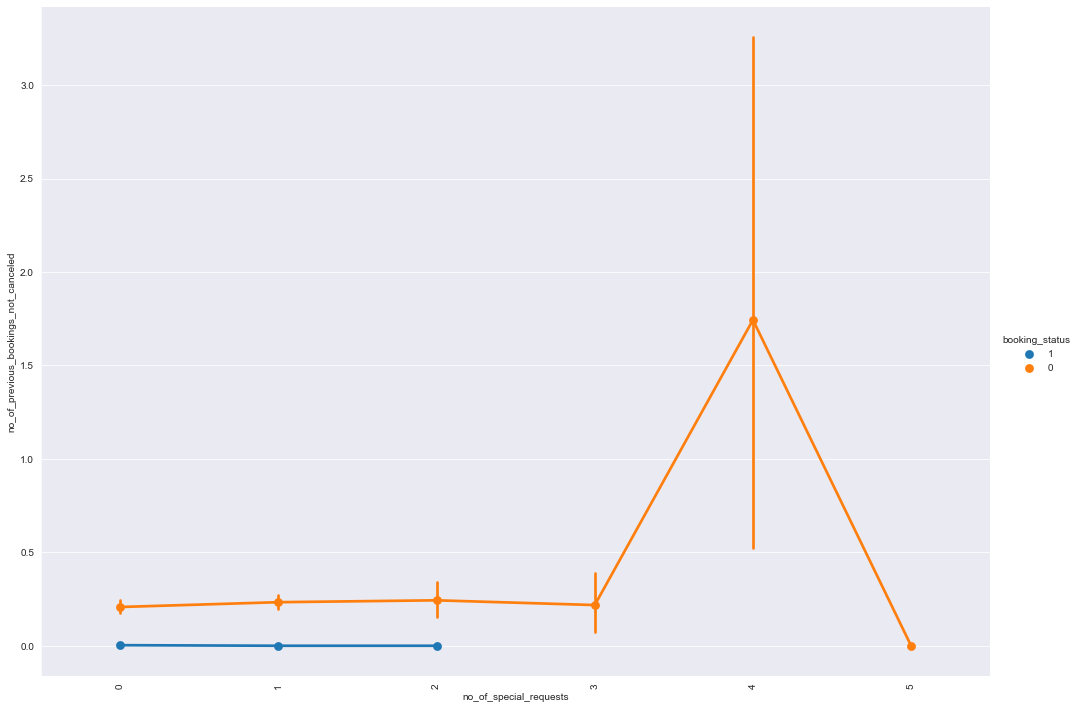

In [41]:
sns.catplot(data=df, kind='count', x="no_of_special_requests",hue='booking_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

sns.catplot(data=df, kind='point', x="no_of_special_requests", y="no_of_previous_cancellations",hue='booking_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

sns.catplot(data=df, kind='point', x="no_of_special_requests", y="no_of_previous_bookings_not_canceled",hue='booking_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- (6) It seems that customers whom made more than 2 request didn't cancel their booking. That being said, however, there is no significant pattern that these requirements affect booking cancellation.


There were no missing values detected. There is no necessary feature engineering required. In addition, we will not treat the outliers in this dataset as they are actual values. Since a data preprocessing was done earlier so without any further ado we proceed with data preparation for modelling.

### Data Preparation

In [42]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [43]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


- The percentages of booking status from the original data is preserved in both the training and test sets.

## Model evaluation

**Model evaluation criterion**


**Model can make wrong predictions as:**
- Predicting a guest will not cancel their booking but in reality, the guest cancelled booking (FN).
- Predicting a guest will cancel their booking but in reality, the guest will not cancel (FP).

**Which case is more important?**

- If we predict that a guest will not cancel their booking but in reality, the guest cancelled booking, then INN hotel will have to bear for extra cost in management and worst case scenario wasting resources.
- If we predict that a guest will cancel their booking but in reality, the guest will not cancel, then INN hotel might lose customer satisfcation and affects the reputation of the hotel.
- In this case both cases are important in our analysis.

**How to reduce the losses?**

INN Hotels Group would want *F1 score* to be maximized, greater the *F1 score* higher are the chances of minimizing the False Negatives and False Positives.

## Building a Logistic Regression model

In [46]:
# fitting the model on training set
logit1 = sm.Logit(y_train, X_train.astype(float))
lg = logit1.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Mon, 22 Aug 2022   Pseudo R-squ.:                  0.3293
Time:                        23:15:06   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.389    -687.795
no_of_adults                             0.1135      

#### Observations:

- Negative values of the coefficient show that the probability of a booking being cancelled decreases with the increase of the corresponding attribute value.
 
- Positive values of the coefficient show that the probability of a booking being cancelled increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. Considering the significance level to be 0.05 (5%), so any variable with a p-value less than 0.05 would be considered significant.

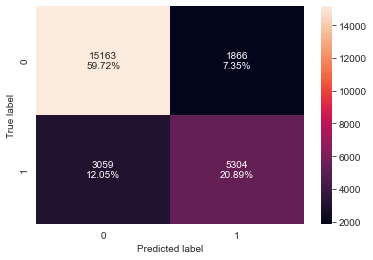

In [47]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [48]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63422,0.73975,0.68293


#### Observations:

- The *F1 score* of the model is 0.6829 and we will try to maximize it further.

- Before that we first check for multicollinearities

## Checking Multicollinearity

In [49]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                  39468156.70600
no_of_adults                                  1.34815
no_of_children                                1.97823
no_of_weekend_nights                          1.06948
no_of_week_nights                             1.09567
lead_time                                     1.39491
arrival_year                                  1.43083
arrival_month                                 1.27567
arrival_date                                  1.00674
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05042
no_of_special_requests                        1.24728
type_of_meal_plan_Meal Plan 2                 1.27185
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1.27218
required_car_parking_space_1                  1.03993
room_type_reserved_Room_Type 2                1.10144
room_type_rese

- The `market_segment` feature seems to have very high VIF values. We first remove the highest which is `market_segment_type_Online` and check if it affects model performance.

In [50]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39391371.31459
no_of_adults                                  1.33178
no_of_children                                1.97735
no_of_weekend_nights                          1.06904
no_of_week_nights                             1.09512
lead_time                                     1.39064
arrival_year                                  1.42838
arrival_month                                 1.27463
arrival_date                                  1.00672
no_of_previous_cancellations                  1.39545
no_of_previous_bookings_not_canceled          1.65175
avg_price_per_room                            2.04959
no_of_special_requests                        1.24242
type_of_meal_plan_Meal Plan 2                 1.27150
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1.27039
required_car_parking_space_1                  1.03979
room_type_reserved_Room_Type 2                1

In [51]:
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80577,0.63374,0.73929,0.68246


- Dropping `market_segment_type_Online` fixed multicollinearity and it didn't affect the model performance.
- No signs of multicollinearity anymore, so we proceed with removing high p-value variables.

In [52]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Mon, 22 Aug 2022   Pseudo R-squ.:                  0.3292
Time:                        23:15:08   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -933.3324    120.655     -7.736      0.000   -1169.813    -696.852
no_of_adults                             0.1060      

- In all the attributes, only one of the dummy variable ha high p-value, hence we will be dropping them iteratively with the following function.

In [53]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'required_car_parking_space_1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'repeated_guest_1']


In [54]:
X_train2 = X_train1[selected_features]

In [55]:
logit3 = sm.Logit(y_train, X_train2.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Mon, 22 Aug 2022   Pseudo R-squ.:                  0.3283
Time:                        23:15:08   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

- All attributes are significant, so *X_train2* will be final and *lg3* is our final model.

#### Observations:

- Coefficient of `no_of_adults`, `no_of_children`, `no_of_weekend_nights`, `no_of_week_nights`, `lead_time`, `arrival_year`, `no_of_previous_cancellations`, `avg_price_per_room`, and `type_of_meal_plan` are positive; an increase in these will lead to increase in chances of a booking cancellation. 

- Coefficient of `arrival_month`, `no_of_special_requests`, `required_car_parking_space`, `room_type_reserved`, `market_segment_type`, and `repeated_guest_1` are negative; increase in these will lead to decrease in chances of a booking cancellation.




**Converting coefficients to odds**

In [56]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns)

,Odds,Change_odd%
const,0.00000,-100.00000
no_of_adults,1.11475,11.47536
no_of_children,1.16436,16.43601
no_of_weekend_nights,1.11475,11.47526
no_of_week_nights,1.04264,4.26363
lead_time,1.01584,1.58352
arrival_year,1.57324,57.32351
arrival_month,0.95853,-4.14725
no_of_previous_cancellations,1.25716,25.71567
avg_price_per_room,1.01935,1.93479


## Model performance evaluation

**Training performance**

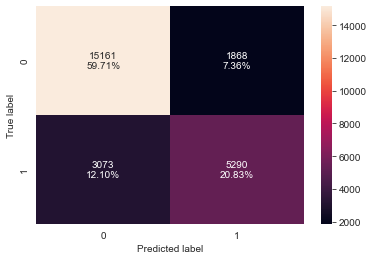

In [57]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train)

In [58]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


**Test performance**

In [59]:
X_test2 = X_test[list(X_train2.columns)]

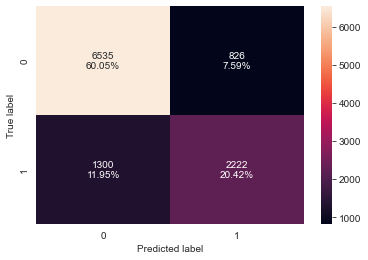

In [60]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test)

In [61]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


#### Observations:

- The model has *F1_score* of 0.682 and 0.676 on the training and test sets respectively.
- Other metrics are also looking healthy.
- Both performances are comparable so the model is not overfitting.
- We proceed with improving the performance of the model.

### ROC Curve and ROC-AUC
* ROC-AUC on training set

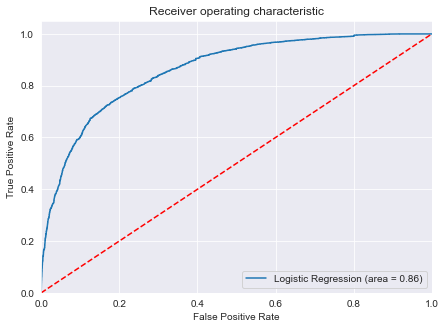

In [62]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- The model is performing very well in the training set.

### Optimal threshold using AUC-ROC curve

In [63]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234883354


**Check model training performance**

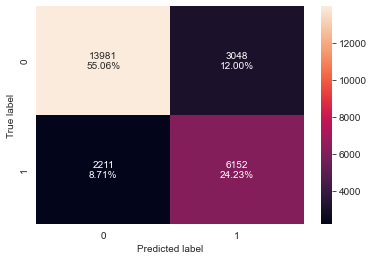

In [64]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [65]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.73562,0.66870,0.70056


#### Observations:

- The *F1_score* has increased to 0.70 
- Accuracy didn't seem to change much and minor trade-off between recall and precision.

**Check model performance in test set**

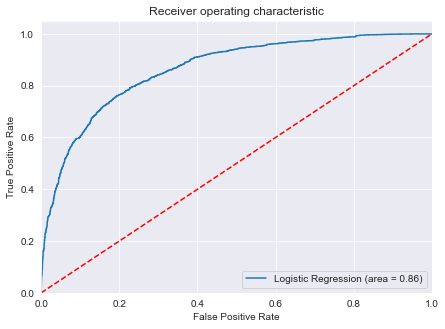

In [66]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

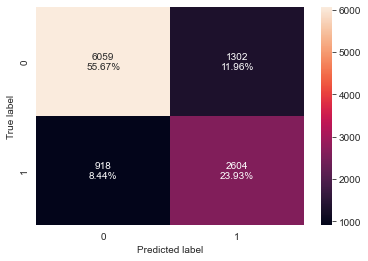

In [67]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [68]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79601,0.73935,0.66667,0.70113


- No difference at all between the performance in training and test set. The model has been improved and is doing well.
- We further continue another method of searching threshold for potential model improvement.

### Precision-Recall Curve

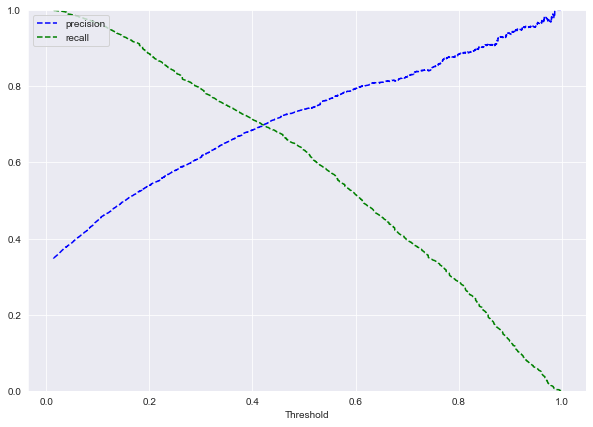

In [69]:
y_scores = lg3.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [70]:
# searching the intersection point of recall and precision
print(intersection(rec.tolist(),prec.tolist()))
intersected = intersection(rec.tolist(),prec.tolist())

[1.0, 0.6989118737295229, 0.6989118737295229, 0.6989118737295229, 0.6989118737295229, 0.6989118737295229, 0.6989118737295229, 0.6989118737295229, 0.6989118737295229]


In [71]:
# extract the threshold 
intersect = pd.DataFrame({'prec': prec[:-1],
                          'rec': rec[:-1],
                          'tre': tre})

intersect[intersect['prec'] == 0.6989118737295229]

,prec,rec,tre
11919,0.69891,0.69891,0.42096


- The balance of recall and precision is at the threshold of around 0.42.

In [72]:
# setting the threshold
optimal_threshold_curve = 0.42

**Check model performance in both training and test set**

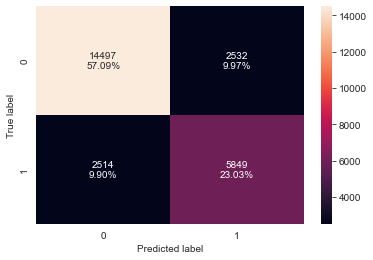

In [73]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train, threshold=optimal_threshold_curve)

In [74]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80128,0.69939,0.69789,0.69864


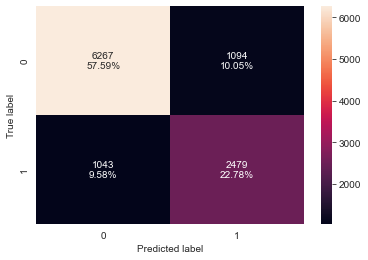

In [75]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_curve)

In [76]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80364,0.70386,0.69381,0.69880


#### Observations:

- *F1_score* decreased slightly compared to previous threshold at 0.37. Overall, performed a little bit better than the default threshold.

## Final Model Summary

In [77]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80541,0.79289,0.80128
Recall,0.63255,0.73562,0.69939
Precision,0.73903,0.66870,0.69789
F1,0.68166,0.70056,0.69864


In [78]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79601,0.80364
Recall,0.63089,0.73935,0.70386
Precision,0.72900,0.66667,0.69381
F1,0.67641,0.70113,0.69880


- All the three models are performing somewhat-well on both training and test data without the problem of overfitting.
- The model with 0.37 threshold is giving the best F1 score. Therefore it will be selected as the final model.

#### Summary from our final logit model

- A predictive model has been built for INN Hotels Group to find customers who cancelled their booking with an *F1_score* of 0.70.
- Coefficient of `no_of_adults`, `no_of_children`, `no_of_weekend_nights`, `no_of_week_nights`, `lead_time`, `arrival_year`, `no_of_previous_cancellations`, `avg_price_per_room`, and `type_of_meal_plan` are positive; an increase in these will lead to increase in chances of a booking cancellation. 
- Coefficient of `arrival_month`, `no_of_special_requests`, `required_car_parking_space`, `room_type_reserved`, `market_segment_type`, and `repeated_guest_1` are negative; increase in these will lead to decrease in chances of a booking cancellation.

## Building a Decision Tree model

Initial model

In [81]:
dTree1 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Visualizing the Decision Tree

In [82]:
feature_names = list(X.columns)
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'required_car_parking_space_1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'repeated_guest_1']


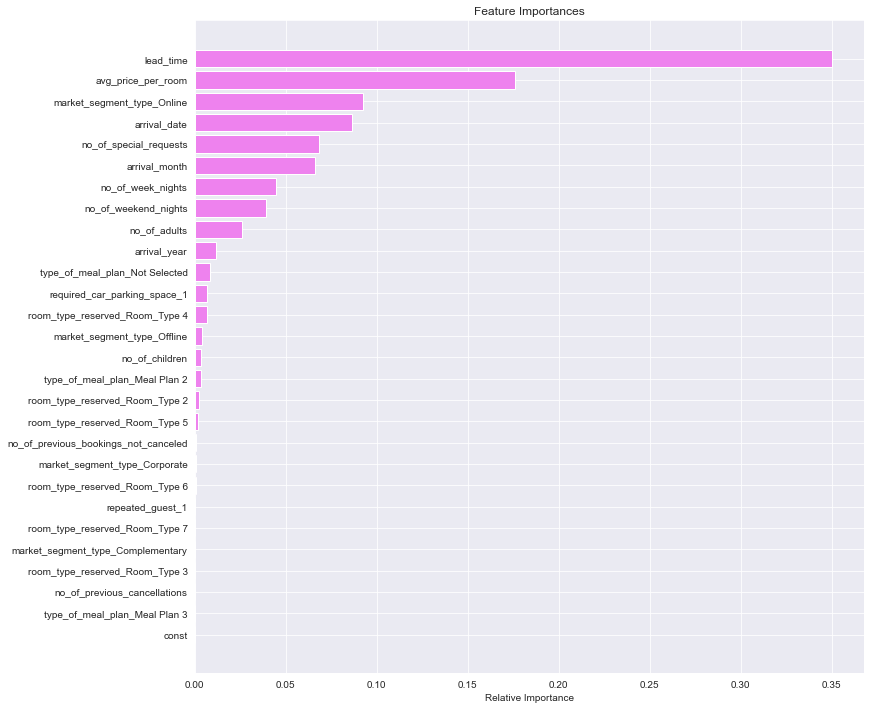

In [84]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- `lead_time`, `avg_price_per_room`, `market_segment_type_Online` are the top 3 important features, followed by `arrival_date`.

## Do we need to prune the tree?

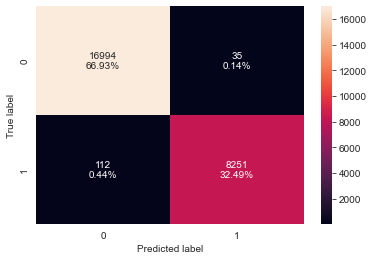

In [85]:
confusion_matrix_sklearn(dTree1, X_train, y_train)

In [86]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


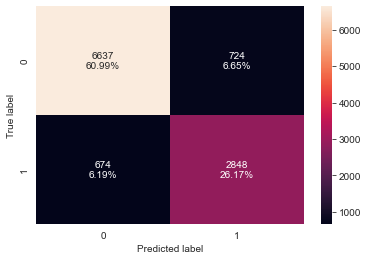

In [87]:
confusion_matrix_sklearn(dTree1, X_test, y_test)

In [88]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87154,0.80863,0.79731,0.80293


- Our decision tree model has significant difference in performance between training and test set, which means it is overfitting. Hence model pruning is required.

### Pre-pruning

In [89]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
    'min_impurity_decrease': [0.001,0.01,0.1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50,
                       min_impurity_decrease=0.01, min_samples_split=10,
                       random_state=1)

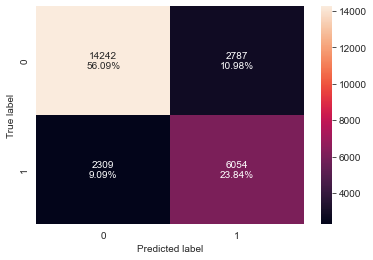

In [90]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [91]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.79931,0.72390,0.68476,0.70379


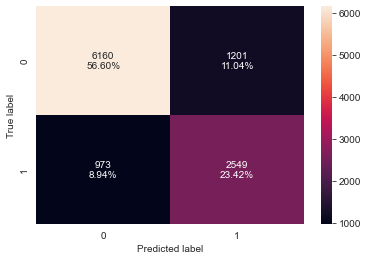

In [92]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [93]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.80024,0.72374,0.67973,0.70105


- The model is giving a more generalized result now as all the performance metrics are more comparable than before. The model is able to generalize well on unseen data.
- *F1_score* is of 0.70 and model has become simpler.

In [94]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

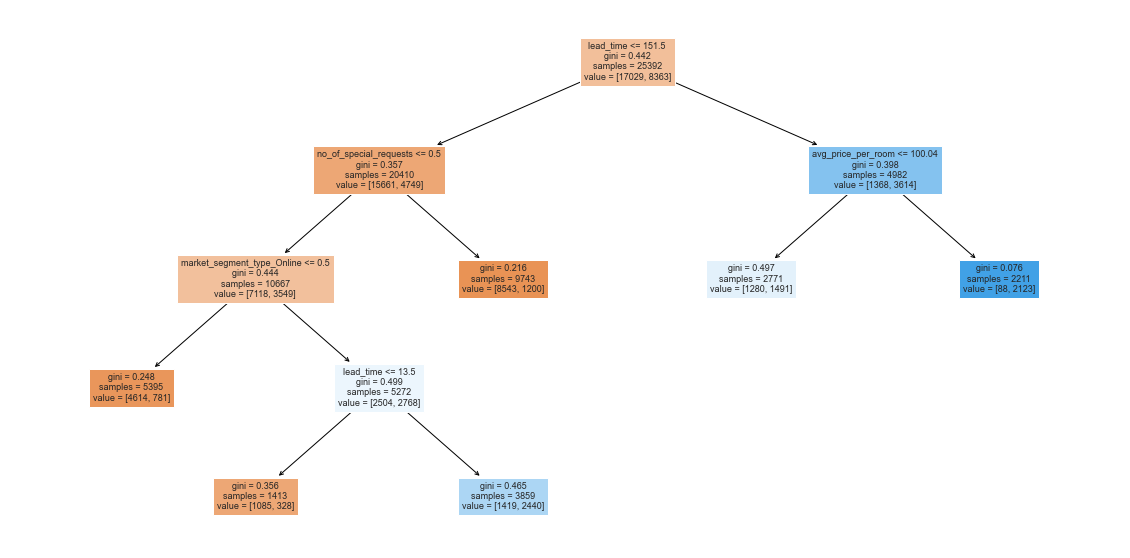

In [95]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [96]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4614.00, 781.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- weights: [1085.00, 328.00] class: 0
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- weights: [1419.00, 2440.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [8543.00, 1200.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1280.00, 1491.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [88.00, 2123.00] class: 1



#### Observations:

- If the lead time is less than or equal to 151.5, the number of special request is less than 1, and if the market segment type is not online, then the booking is not likely to be cancelled.
- If the lead time is less than or equal to 151.5, the number of special request is less than 1, and if the market segment type is online, and lead time is less than 13.5, then the booking is also not likely to be cancelled. However if lead time is more than 13.5, the booking is likely to be cancelled.
- If the lead time is less than or equal to 151.5, the number of special request is more than or equal 1, then the booking is not likely to be cancelled.
- If lead time is greater than 151.5, whether the average price per room is less than or equal to or even greater than 100.04, the booking is likely to be cancelled.

In [97]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.57872027, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11145248, 0.11371614, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19611111, 0.        ])

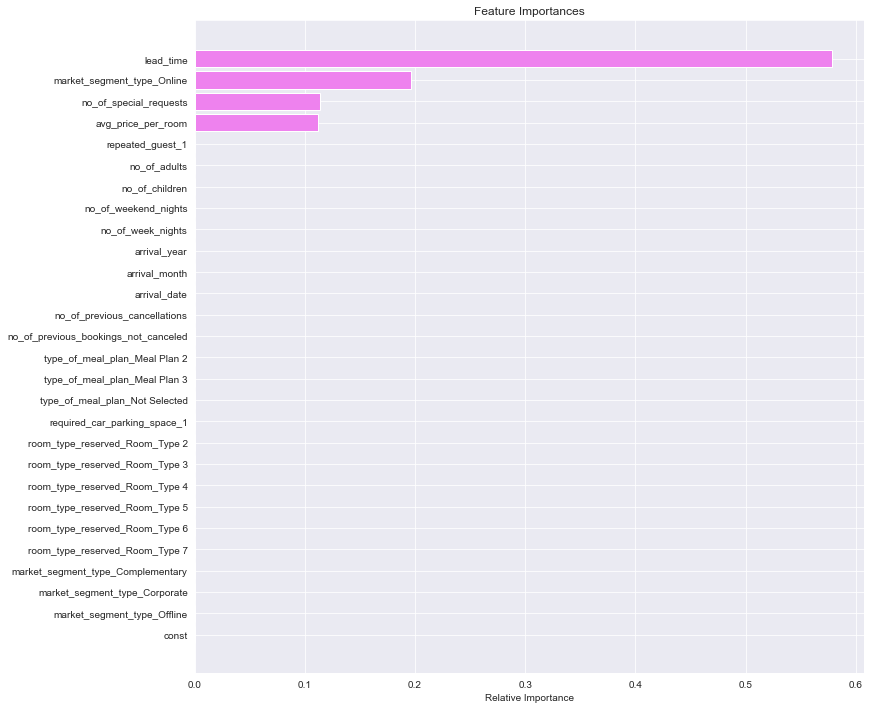

In [98]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Here, `lead_time`, `market_segment_type_Online`, `no_of_special_requests` are the top 3 important feature, followed by `avg_price_per_room`.

### Post-pruning

In [99]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [100]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00757
1,0.00000,0.00757
2,0.00000,0.00757
3,0.00000,0.00757
4,0.00000,0.00757
...,...,...
1348,0.00667,0.28690
1349,0.01304,0.29994
1350,0.01726,0.31720
1351,0.02399,0.36518


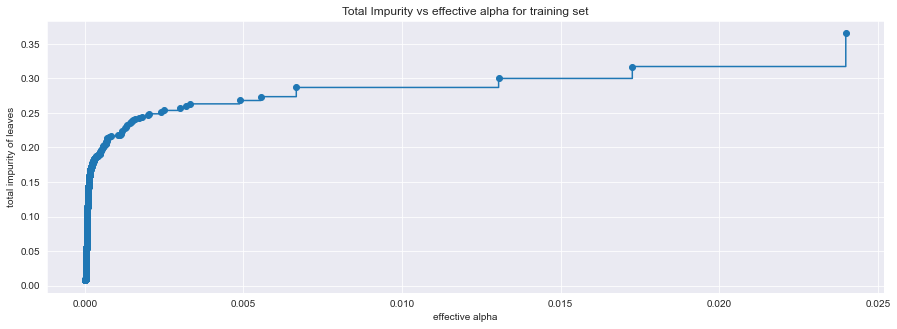

In [101]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [102]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.07657789477371368


Removing the last element in `clfs` and `ccp_alphas` since it has only one node.

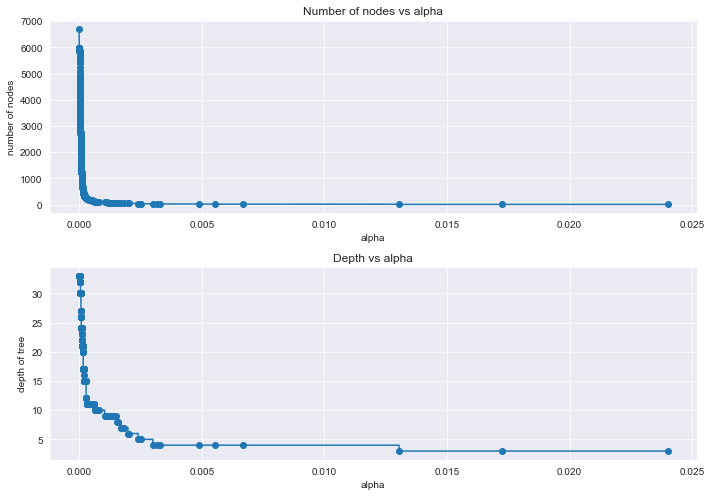

In [103]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [104]:
F1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    F1_train.append(values_train)

In [105]:
F1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    F1_test.append(values_test)

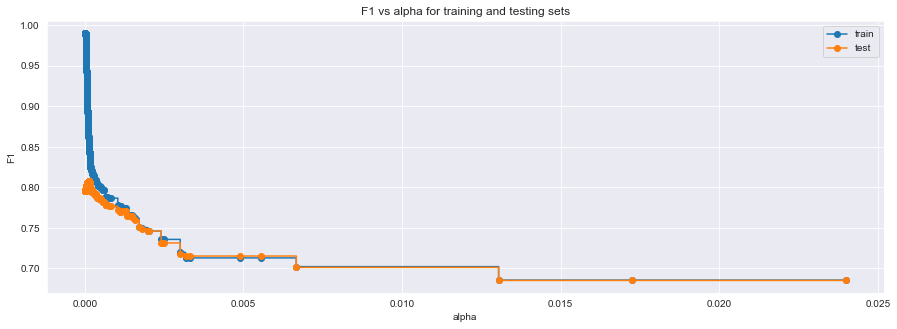

In [106]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, F1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, F1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [107]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(F1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00013158164237025462,
                       class_weight='balanced', random_state=1)


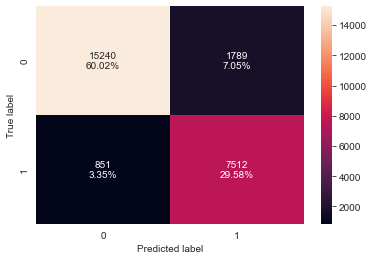

In [108]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [109]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89603,0.89824,0.80766,0.85054


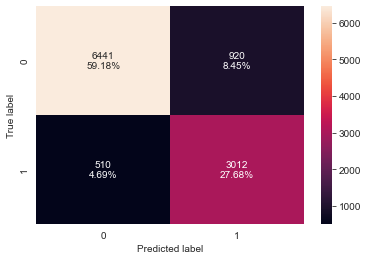

In [110]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [111]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86860,0.85520,0.76602,0.80816


- The model is somewhat giving a generalized result.
- *F1_score* is higher in this model.

In [114]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

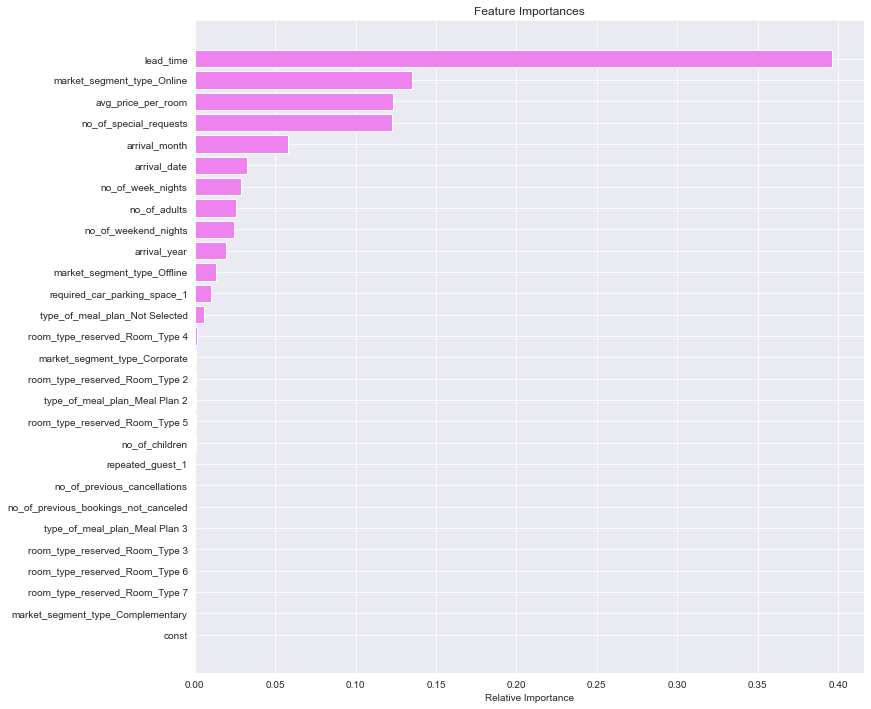

In [115]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The top 4 important features are the same as in pre-pruned tree model. In addition, there are more important features appearing.

## Model Performance Comparison and Conclusions

In [116]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Initial Decision Tree Model",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Logistic Regression-0.37 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Initial Decision Tree Model,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),Logistic Regression-0.37 Threshold
Accuracy,0.99421,0.79931,0.89603,0.79289
Recall,0.98661,0.72390,0.89824,0.73562
Precision,0.99578,0.68476,0.80766,0.66870
F1,0.99117,0.70379,0.85054,0.70056


In [117]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Initial Decision Tree Model",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Logistic Regression-0.37 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Initial Decision Tree Model,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),Logistic Regression-0.37 Threshold
Accuracy,0.87154,0.80024,0.86860,0.79601
Recall,0.80863,0.72374,0.85520,0.73935
Precision,0.79731,0.67973,0.76602,0.66667
F1,0.80293,0.70105,0.80816,0.70113


- The post pruned tree has the highest *F1_score* of 0.81.
- The post pruned tree seems to be the better model as the all the performance metrics were better on both training and test sets than the pre-pruned tree.
- Moreover, the post pruned tree performed way better than the best logit model we had earlier.

## Actionable Insights and Recommendations

We have built and chosen 2 preferred models in their respective model analysis, one logit with 0.37 threshold and one post-pruned decision tree model. Although our post-pruned decision tree seems to be the preferred one, both model has their own unique results and interpretability and are ready for INN Hotels Group to choose the most suitable one.

#### Insights:
**Logit with threshold 0.37**
- Coefficient of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room, and type_of_meal_plan are positive; an increase in these will lead to increase in chances of a booking cancellation.
- Coefficient of arrival_month, no_of_special_requests, required_car_parking_space, room_type_reserved, market_segment_type, and repeated_guest_1 are negative; increase in these will lead to decrease in chances of a booking cancellation.

**Post-pruned decision tree**
- The model built can be used to predict if a booking is cancelled or not and can correctly identify, with a precision of, both together with an average of 80.8\% of the cancelled bookings.
- `lead_time`, `market_segment_type_Online`, `avg_price_per_room`, `no_of_special_requests`, are the most important variables in predicting whether a booking will be cancelled or not. In addition with a few more variables with smaller relative importance to be considered.
- Taking one of the many scenario, if lead time is less than or equal to 151.50, the number of special request is less than 1, the market segment is not online, and the lead time is less than or equal to 90.50, the number of weekend nights is less than 1, the average price per room is less than or equal to 196.50, the market segment is not offline, and the lead time is less than or equal 16.50, the average price per room is greater than 68.50, and if the arrival date is greater than 29, then it is likely that the booking will be cancelled.

#### Recommendations (based on post-pruned decision tree): 
- INN Hotels Group should be aware of bookings that has high lead time as it prones to be cancelled. Infact, extra charges should be applied if the booking were cancelled.
- Our target customers are generally those who arrives early, booked a reasonable average price room not via online segment with no special requests.
- A possible criteria for cancellation charges or non-refund should depend on primarily these factors - high lead time, online bookings, expensive rooms and a lot of special requests.





